# ICC T20 World Cup (2024) Analysis

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


# 🏏 T20 World Cup Data Analysis

This notebook analyzes T20 World Cup match data to uncover insights related to:

- Team performance
- Toss impact
- Batting first vs chasing
- Venue performance
- Player of the Match trends
- Top batters and bowlers

We explore statistical summaries and visualizations to understand winning patterns and conditions that influence match outcomes.


### Data Loading  

In [38]:
data = pd.read_csv("ICC Mens T20 Worldcup.csv")

In [39]:
print(data.head())

  Match No.                  Date  \
0       1st  Saturday,June 1,2024   
1       2nd    Sunday,June 2,2024   
2       3rd    Sunday,June 2,2024   
3       4th    Monday,June 3,2024   
4       5th    Monday,June 3,2024   

                                               Venue          1st Team  \
0                      Grand Prairie Stadium, Dallas            Canada   
1                         Providence Stadium, Guyana  Papua New Guinea   
2              Kensington Oval, Bridgetown, Barbados              Oman   
3  Nassau County International Cricket Stadium, N...         Sri Lanka   
4                         Providence Stadium, Guyana       Afghanistan   

                  2nd Team    Stage             Toss Winning Toss Decision  \
0  United State Of America  Group A  United State Of America      Fielding   
1              Afghanistan  Group C              Afghanistan      Fielding   
2                  Namibia  Group B                  Namibia      Fielding   
3             South 

## 📂 Dataset Structure

The dataset contains information about each match including:

- **Teams:** 1st Team, 2nd Team, Winners  
- **Scores:** First Innings Score, Second Innings Score  
- **Toss:** Toss Winning, Toss Decision  
- **Venue and Stage**  
- **Player Stats:** Top Scorer, Best Bowler, Player of the Match  

We'll first explore the structure, check for missing values, and understand basic dataset features.


In [40]:
print(data.isna().sum())
print(data.shape)

Match No.                            0
Date                                 0
Venue                                0
1st Team                             0
2nd Team                             0
Stage                                0
Toss Winning                         0
Toss Decision                        0
First Innings Score                  0
Fall of wickets First Innings        0
Second Innings Score                 0
Fall of wickets Second Innings       0
Winners                              0
Method                               0
Won by                               0
Winning Margin                       0
Top Scorer                           0
Highest Score                        0
Best Bowler                          0
Best Bowler Figure(Wickets Taken)    0
Best Bowler Figure(Runs Recieved)    0
Player Of The Match                  0
dtype: int64
(55, 22)


### Remove Unwanted Columns

In [41]:
data = data.drop(['Match No.','Method',],axis=1)


In [42]:

mask = data.apply(lambda row: row.astype(str).str.contains("rain", case=False, na=False)).any(axis=1)

data = data.loc[~mask].reset_index(drop=True)


In [43]:
print(data.columns)

Index(['Date', 'Venue', '1st Team', '2nd Team', 'Stage', 'Toss Winning',
       'Toss Decision', 'First Innings Score', 'Fall of wickets First Innings',
       'Second Innings Score', 'Fall of wickets Second Innings', 'Winners',
       'Won by', 'Winning Margin', 'Top Scorer', 'Highest Score',
       'Best Bowler', 'Best Bowler Figure(Wickets Taken)',
       'Best Bowler Figure(Runs Recieved)', 'Player Of The Match'],
      dtype='object')


In [54]:
data.to_csv("t20_sorted.csv",index=False)

# As The data is cleaned we can perform EDA 

## 🎲 Toss Impact Analysis

### Objective:
To determine whether **winning the toss impacts winning the match**.

### Key Points:
- We compare the toss-winning team with the match-winning team.
- We calculate the percentage of matches where the toss winner also won.
- We visualize this using a countplot and statistical correlation.


Text(95.7222222222222, 0.5, 'Toss Winners')

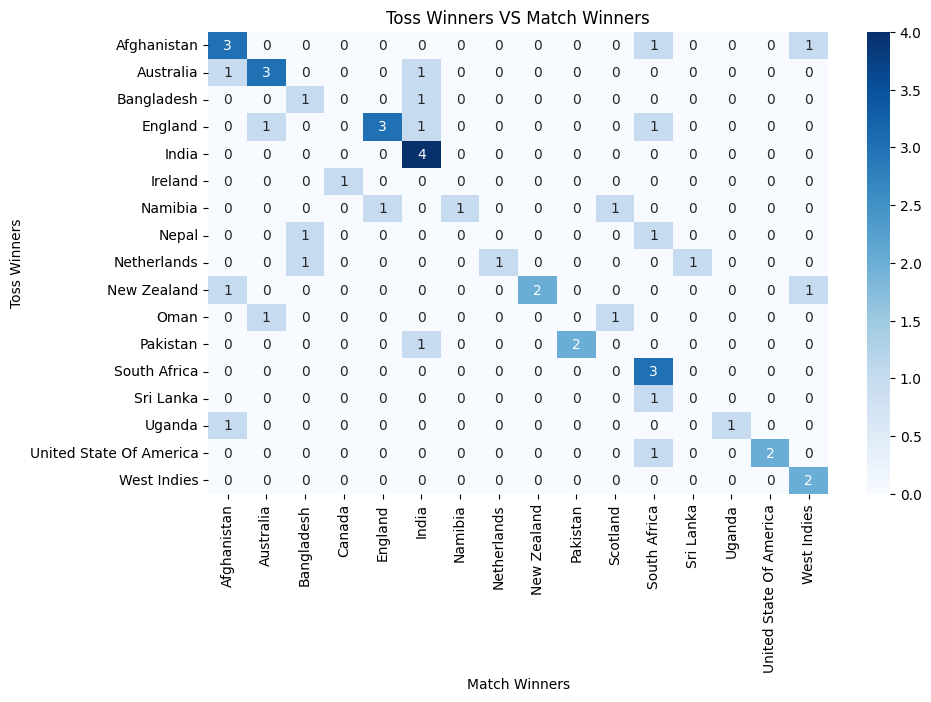

In [44]:
table = pd.crosstab(data['Toss Winning'],data['Winners'])

plt.figure(figsize=(10,6))
sns.heatmap(table,annot=True,fmt='d',cmap='Blues')
plt.title("Toss Winners VS Match Winners")
plt.xlabel("Match Winners")
plt.ylabel("Toss Winners")

In [45]:
data['Venue'].unique()

array(['Grand Prairie Stadium, Dallas', 'Providence Stadium, Guyana',
       'Kensington Oval, Bridgetown, Barbados',
       'Nassau County International Cricket Stadium, New York',
       'Sir Vivian Richards Stadium, North Sound, Antigua',
       'Brian Lara Stadium, Tarouba, Trinidad',
       'Arnos Vale Ground, Kingstown, St Vincent',
       'Daren Sammy National Cricket Stadium, Gros Islet, St Lucia',
       'Central Broward Regional Park Stadium Turf Ground, Lauderhill'],
      dtype=object)

In [46]:
def get_bat_first(row):
    if row['Toss Decision'].lower() == 'batting':
        return row['Toss Winning']
    else:
        return row['1st Team'] if row['Toss Winning'] != row['1st Team'] else row['2nd Team'] 
data['Bat_First_Team'] = data.apply(get_bat_first, axis=1)
data['Bat_First_Won'] = data['Bat_First_Team'] == data['Winners']
data['Win_Type'] = data['Bat_First_Won'].map({True: 'Bat First Won', False: 'Chase Won'})



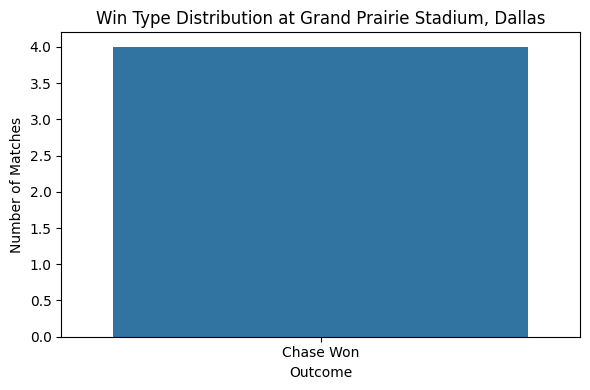

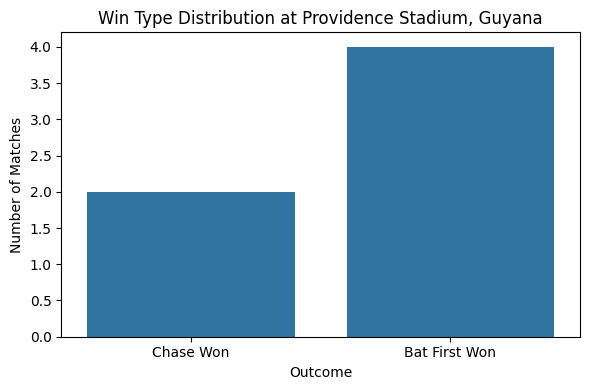

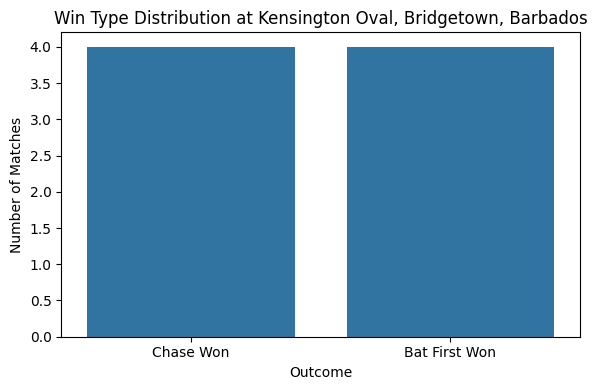

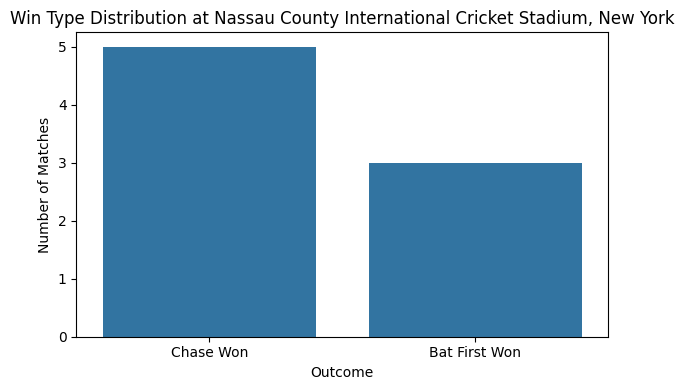

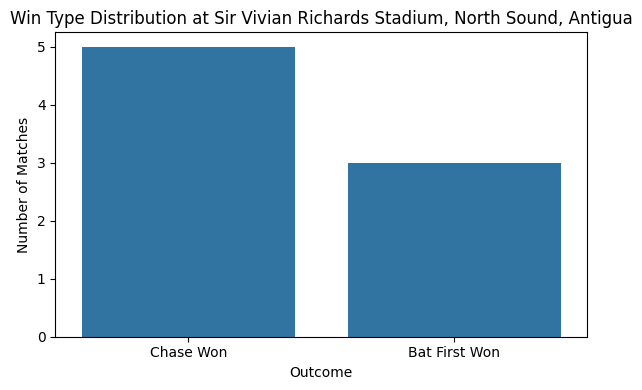

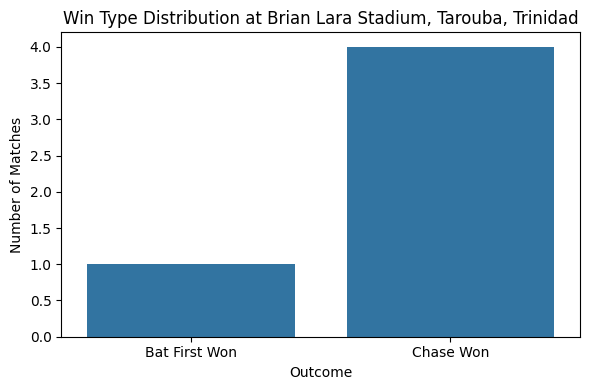

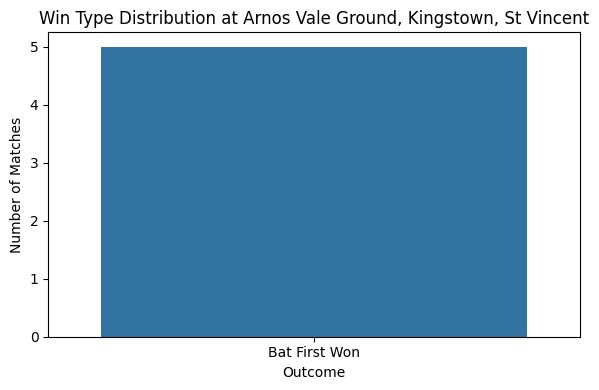

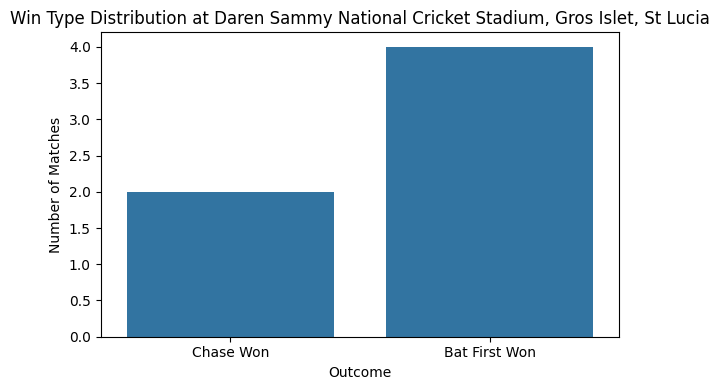

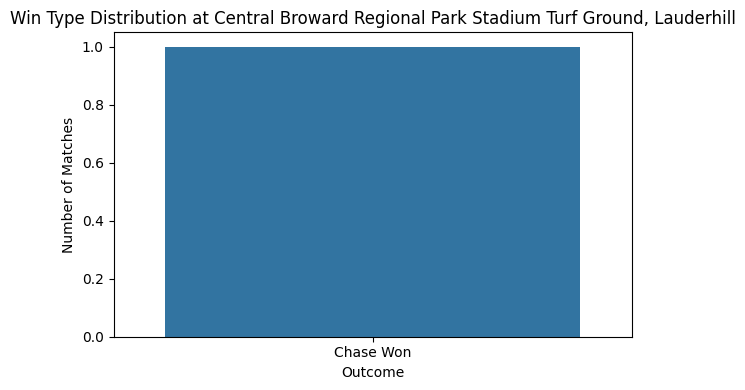

In [47]:


venues = data['Venue'].unique()   

for venue in venues:
    plt.figure(figsize=(6,4))
    
    temp = data[data['Venue'] == venue]
    sns.countplot(data=temp, x='Win_Type')
    
    plt.title(f"Win Type Distribution at {venue}")
    plt.xlabel("Outcome")
    plt.ylabel("Number of Matches")
    plt.tight_layout()
    plt.show()


## 🏅 Team Performance Analysis

### Objective:
To evaluate team efficiency based on:
- Wins and losses
- Win percentage
- Bat-first vs chase results

We also generate pie charts for each team to visualize their win/loss distribution.


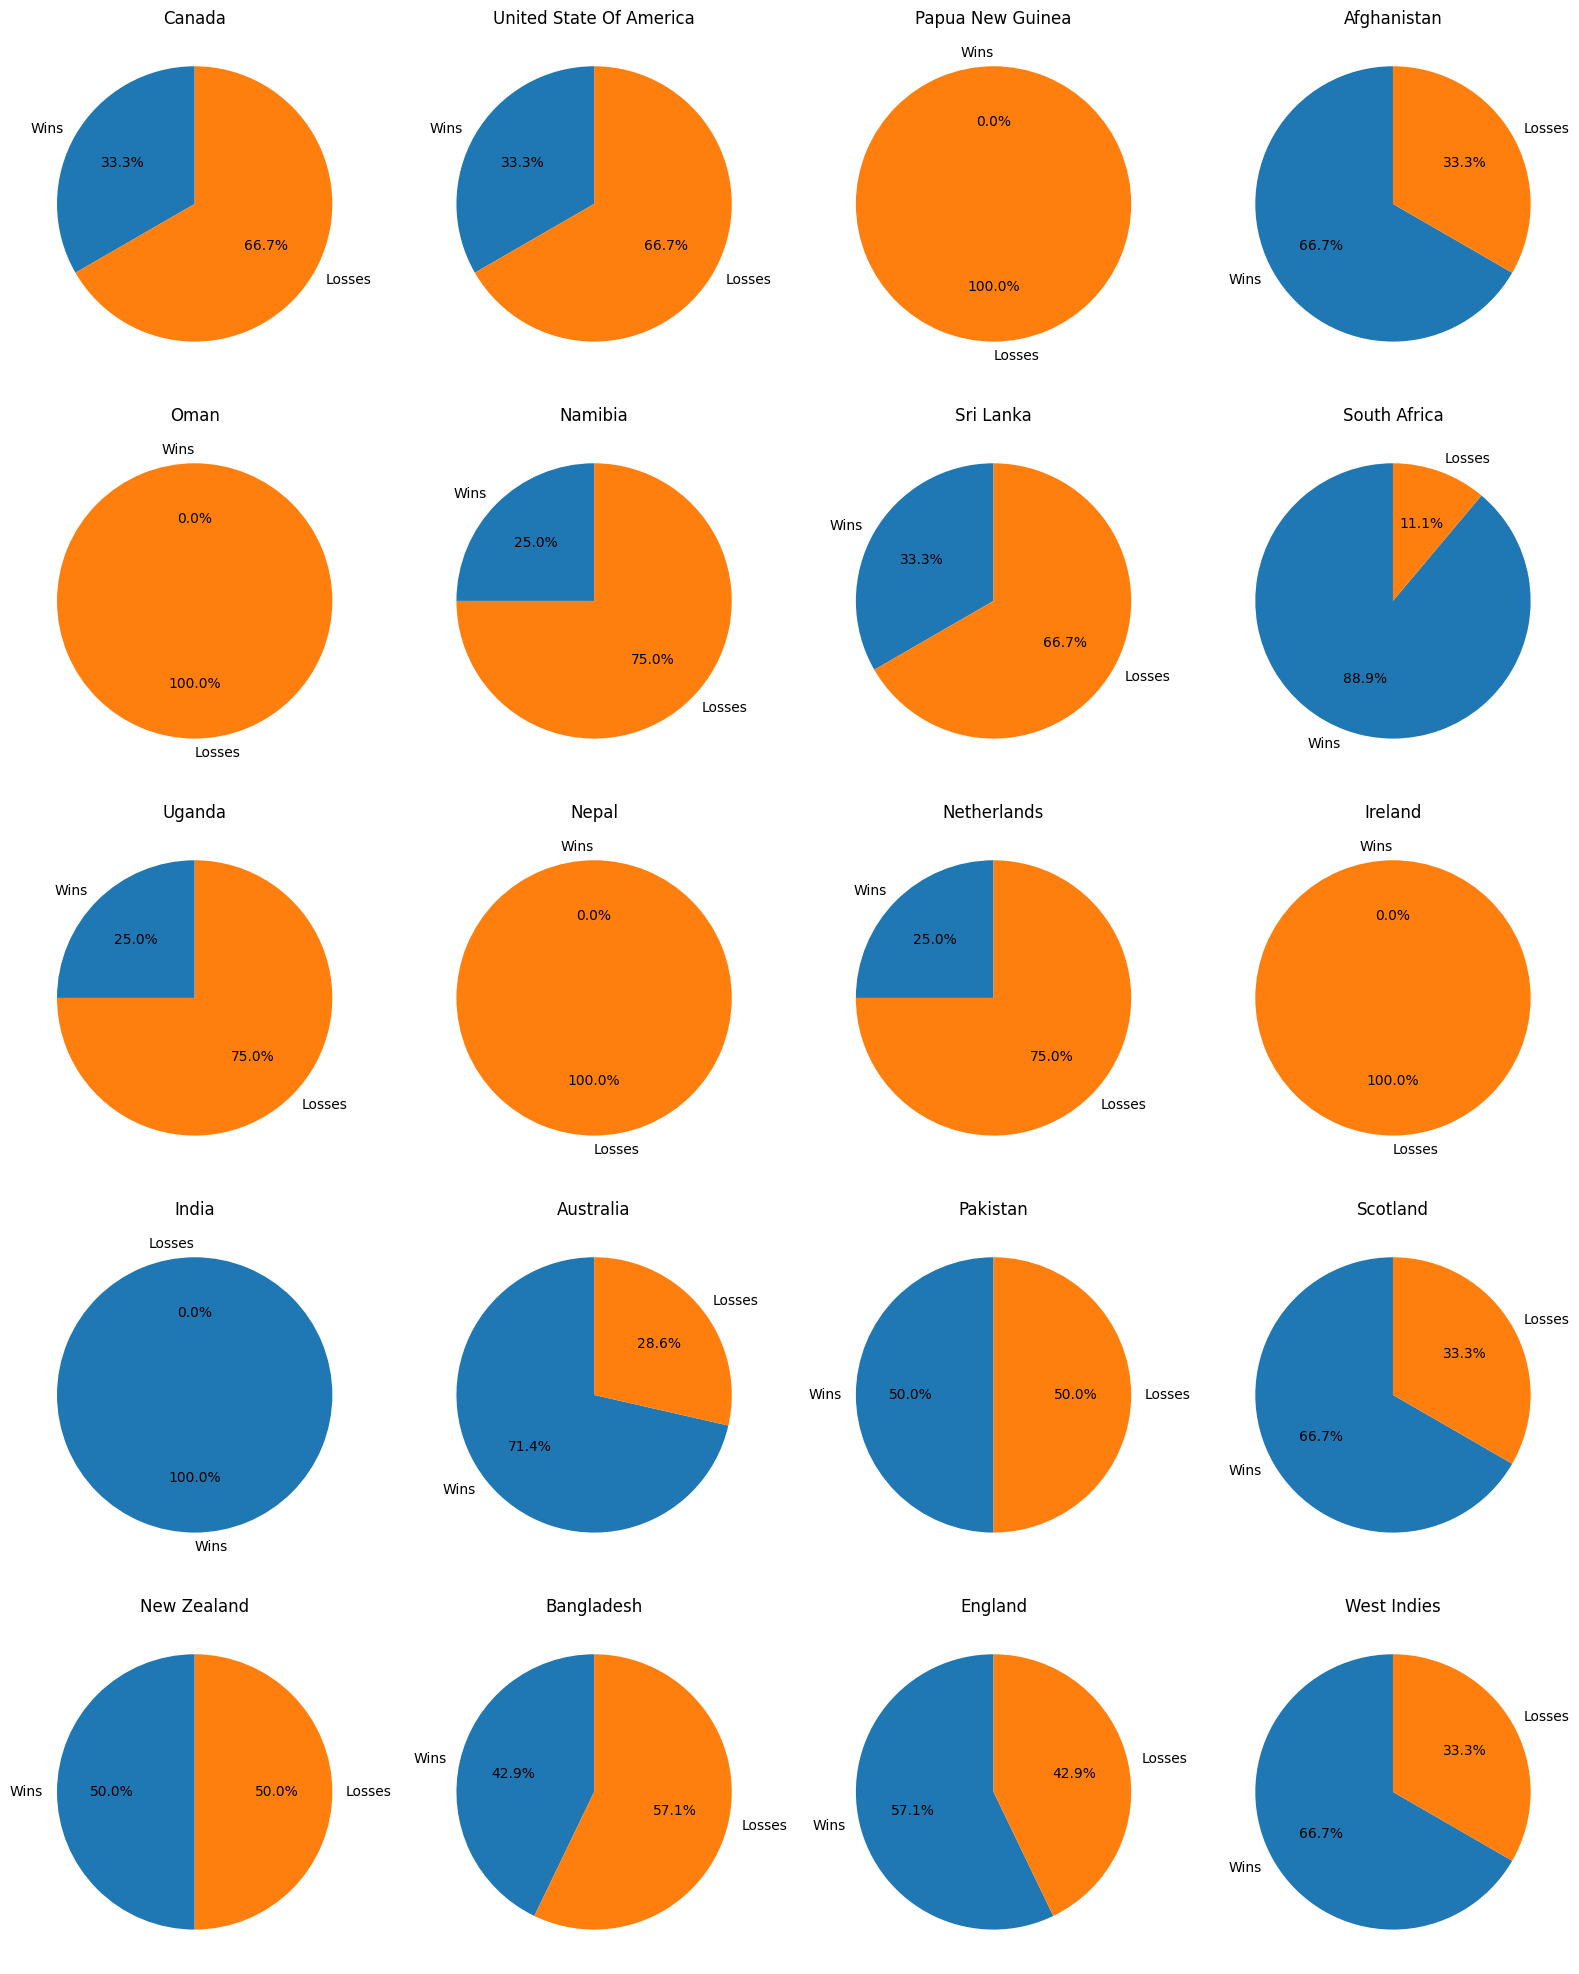

In [48]:
teams = pd.unique(data[['1st Team', '2nd Team']].values.ravel())
teams = [team for team in teams if pd.notna(team)]

n = len(teams)
cols = 4
rows = int(np.ceil(n / cols))

plt.figure(figsize=(cols * 4, rows * 4))

for i, team in enumerate(teams, 1):
    wins = (data['Winners'] == team).sum()
    matches = ((data['1st Team'] == team) | (data['2nd Team'] == team)).sum()
    losses = matches - wins

    plt.subplot(rows, cols, i)
    if matches == 0:
        plt.text(0.5, 0.5, "No matches", ha='center', va='center', fontsize=10)
        plt.title(team)
        plt.axis('off')
        continue

    plt.pie([wins, losses],
            labels=['Wins', 'Losses'],
            autopct='%1.1f%%',
            startangle=90)
    plt.title(team)

plt.tight_layout()
plt.show()


## 🌟 Player of the Match Analysis

### Objective:
To examine trends in Player of the Match awards:
- Top 10 POM winners overall
- Team-wise POM counts
- Venue-wise POM distribution
- POM winners for matches involving each team

Helps identify clutch performers and pressure players.


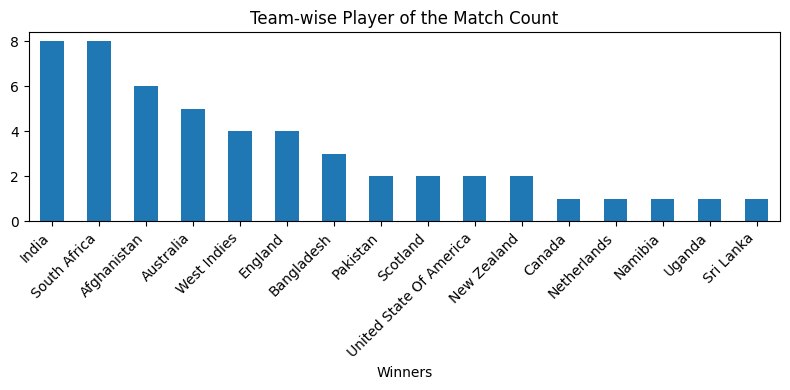

In [49]:
team_pom = data.groupby('Winners')['Player Of The Match'].count().sort_values(ascending=False)

team_pom.plot(kind='bar', figsize=(8,4))
plt.title("Team-wise Player of the Match Count")
plt.xticks(rotation=45 , ha='right')
plt.tight_layout()
plt.show()


## 🔥 Top Batsmen, Top Bowlers & Player of the Match Analysis

### Objective
This section identifies the **top-performing players** in the dataset based on:
- Number of times a player became the **Top Scorer** (Top Batsmen)
- Number of times a player was selected as the **Best Bowler** (Top Bowlers)
- Number of **Player of the Match (POM)** awards (Top POM Players)

### Method
We calculate:
- `value_counts()` on the **Top Scorer**, **Best Bowler**, and **Player Of The Match** columns
- Extract the **Top 10 players** for each category
- Visualize the results with bar charts for better understanding

### Insights Expected
- Identify the most consistent run scorers (Top Batsmen)
- Identify the most effective wicket-takers (Top Bowlers)
- Recognize the most impactful players (POM Winners)

These visualizations highlight standout performers who significantly influenced match outcomes.


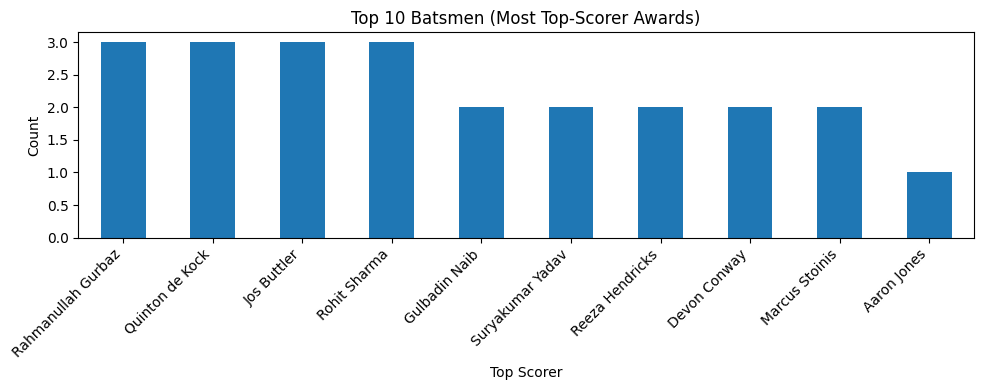

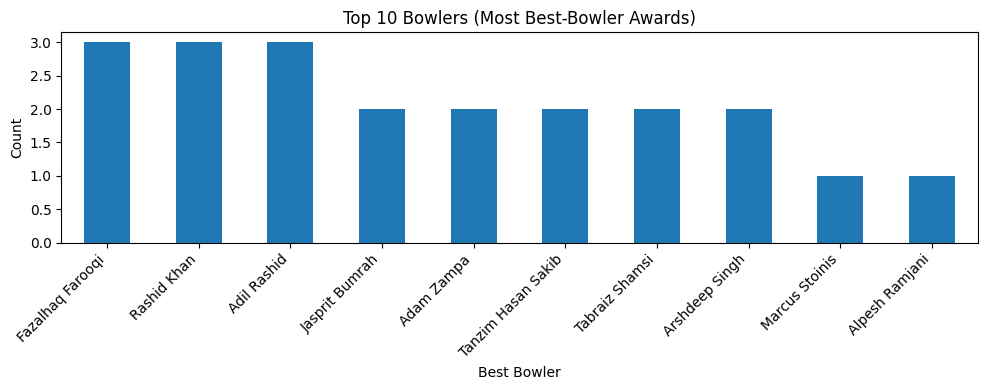

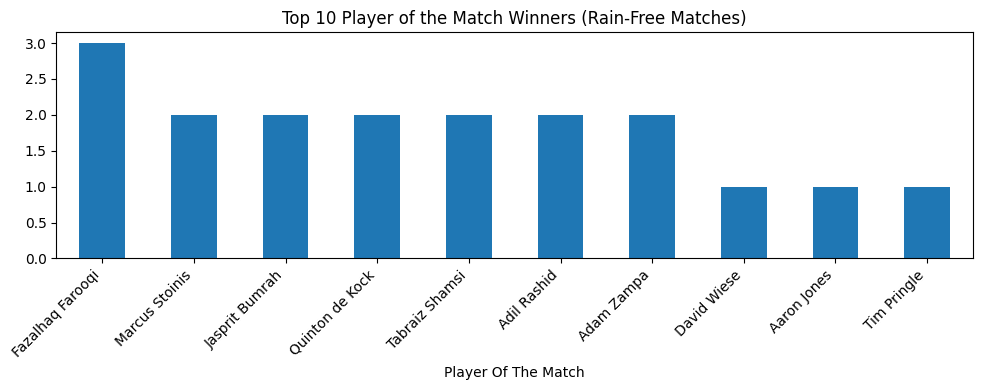

In [53]:

top_batsmen = (
    data['Top Scorer']
    .dropna()
    .astype(str)
    .value_counts()
    .head(10)
)

top_bowlers = (
    data['Best Bowler']
    .dropna()
    .astype(str)
    .value_counts()
    .head(10)
)

pom_top_10 = (
    data['Player Of The Match']
    .dropna()
    .astype(str)
    .value_counts()
    .head(10)
)


plt.figure(figsize=(10,4))
top_batsmen.plot(kind='bar')
plt.title("Top 10 Batsmen (Most Top-Scorer Awards)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,4))
top_bowlers.plot(kind='bar')
plt.title("Top 10 Bowlers (Most Best-Bowler Awards)")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,4))
pom_top_10.plot(kind='bar')
plt.title("Top 10 Player of the Match Winners (Rain-Free Matches)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## 📊 Correlation Analysis

### Objective:
To analyze relationships between numerical variables such as:
- First innings score
- Second innings score
- Winning margin
- Best bowler figures

We generate a correlation heatmap to identify strong or weak relationships.

If needed, categorical columns are label-encoded for extended correlation analysis.


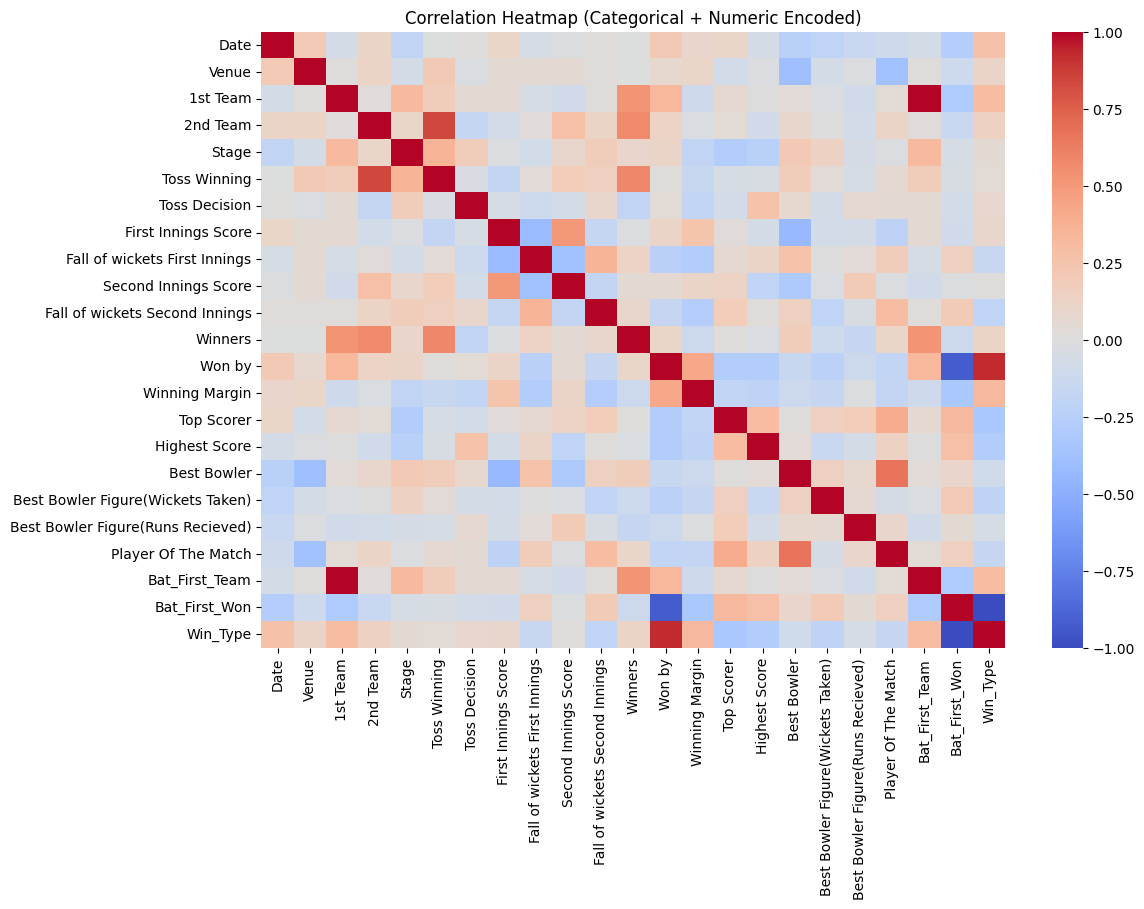

In [51]:
from sklearn.preprocessing import LabelEncoder

df_encoded = data.copy()
le = LabelEncoder()

for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

corr = df_encoded.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm")
plt.title("Correlation Heatmap (Categorical + Numeric Encoded)")
plt.show()


# 🧠 Final Insights and Summary

### Key Insights:
- Does winning the toss significantly affect match results?
- Are certain venues more batting/chasing-friendly?
- Which teams show strong win consistency?
- Who are the standout performers (batters, bowlers, POM)?
- What patterns emerge in winning margins and scoring?

This notebook provides a complete data-driven overview of T20 World Cup trends, helping understand how match conditions and player performance influence outcomes.
